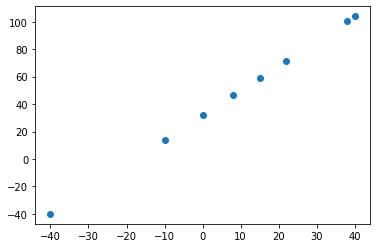

In [ ]:
import tensorflow as tf
import numpy as np

# y = 0.5 * (x - 32)
x = np.array([-40,-10,0,8,15,22,38,40],dtype=float) # celsius
y = np.array([-40,14,32,46.4,59,71.6,100.4,104],dtype=float) # fahrenheit 

plt.plot(x, y, 'o')
plt.show()

In [ ]:
model=tf.keras.Sequential([
  tf.keras.layers.Dense(units=4,input_shape=[1]),
  tf.keras.layers.Dense(units=4),
  tf.keras.layers.Dense(units=3),
  tf.keras.layers.Dense(units=1)
])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
hist=model.fit(x, y, epochs=100, verbose=False, validation_split=0.2)
print('Model Training Finised')

Model Training Finised


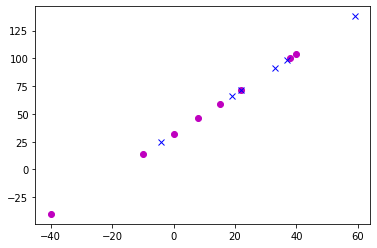

In [ ]:
x_test = [37, 19, 22, 33, 59, -4]
y_test = model.predict(x_test)
plt.plot(x, y, 'mo')
plt.plot(x_test, y_test, 'bx')
plt.show()

# **Export**

In [ ]:
keras_file='cf.h5'
tf.keras.models.save_model(model,keras_file)

#converter=tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
#tfmodel = converter.convert()
#open("degree.tflite","wb").write(tfmodel)

convert_file = 'degree.tflite'
mdl = tf.keras.models.load_model(keras_file)
converter = tf.lite.TFLiteConverter.from_keras_model(mdl)
tflite_model = converter.convert()
open(convert_file, 'wb').write(tflite_model)

1740

{'loss': [2622.648193359375, 2025.1871337890625, 1589.5093994140625, 1126.1639404296875, 922.4392700195312, 1285.6953125, 951.1321411132812, 816.033935546875, 936.5116577148438, 970.8966674804688, 849.324462890625, 679.5235595703125, 603.6010131835938, 647.222900390625, 622.5122680664062, 487.1456604003906, 387.510986328125, 367.021484375, 362.4929504394531, 313.4320373535156, 213.2789764404297, 114.13986206054688, 79.82767486572266, 77.74150848388672, 28.13780975341797, 6.0101637840271, 73.907470703125, 93.83270263671875, 72.84540557861328, 104.05097198486328, 97.89899444580078, 44.566741943359375, 29.949691772460938, 34.269996643066406, 22.13543701171875, 5.509030818939209, 4.270818710327148, 16.350059509277344, 25.538414001464844, 25.7349796295166, 24.378860473632812, 26.46103858947754, 28.392135620117188, 25.343534469604492, 17.90943717956543, 11.113426208496094, 8.124659538269043, 6.5370869636535645, 3.2329225540161133, 0.2835957109928131, 1.17848801612854, 4.569662570953369, 6.45

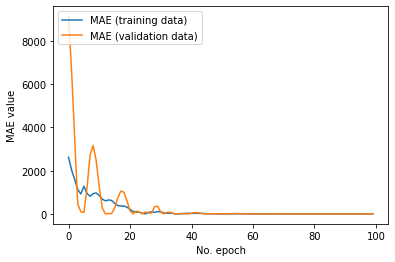

In [ ]:
print(hist.history)
plt.plot(hist.history['loss'], label='MAE (training data)')
plt.plot(hist.history['val_loss'], label='MAE (validation data)')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()